In [2]:
!pip install PennyLane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.7 MB/s eta 0:00:00


In [3]:
import pennylane as qml
import numpy as np

# Codercise I.10.1

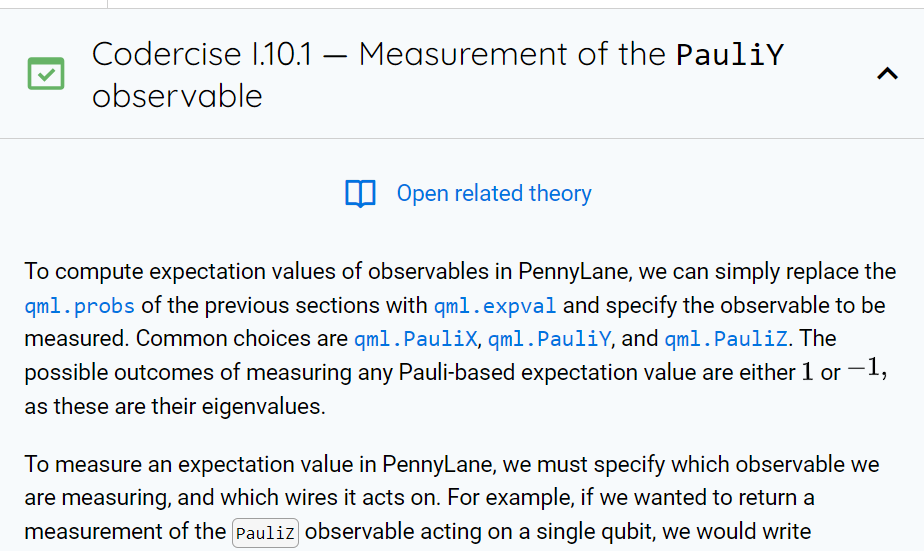

In [4]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4,wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    return qml.expval(qml.PauliY(wires=0))


print(circuit())

-0.7071067811865471


## learnt how to compute expectation values of observables in PennyLane and get the y observable of the circuit shown above

# Codercise I.10.2

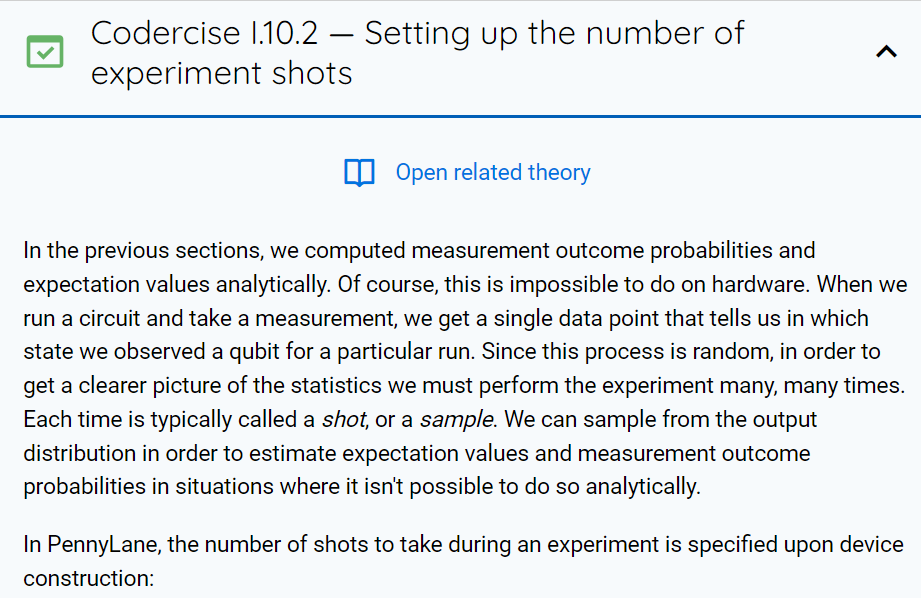

In [5]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device('default.qubit', wires=1, shots=shots)

    @qml.qnode(dev)
    def circuit():
        ##################
        # YOUR CODE HERE #
        ##################

        # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
        qml.RX(np.pi/4,wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)

        return qml.expval(qml.PauliY(wires=0))

# STORE RESULT IN SHOT_RESULTS ARRAY
    shot_results.append(circuit())

print(qml.math.unwrap(shot_results))

[-0.64, -0.708, -0.697, -0.70952, -0.70637]


## Learnt how to run the above circuit on different values of shots and compared the expectation values

# Codercise I.10.3

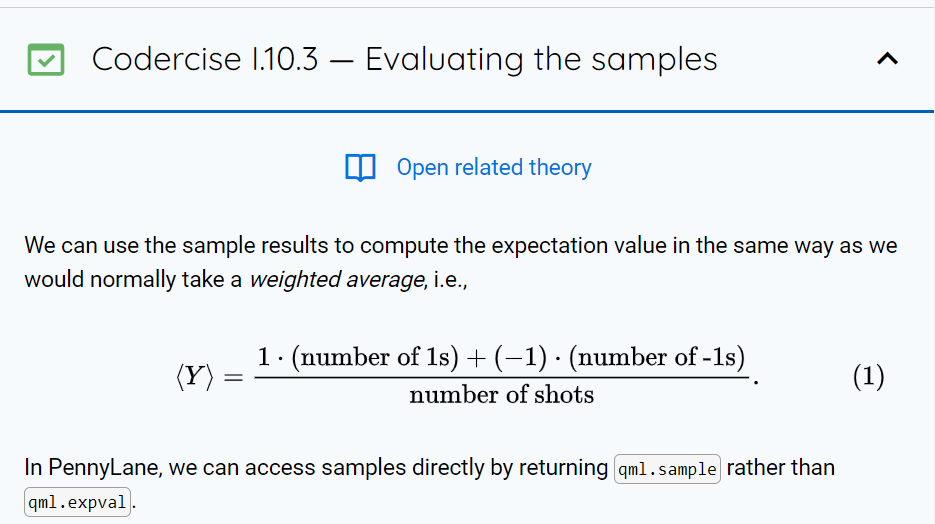

In [6]:
dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(wires=0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE
    estimated_expval = circuit()
    return np.mean(estimated_expval)

samples = circuit()
print(compute_expval_from_samples(samples))

-0.70932


## Learnt how to use the sample results to get the expectation values of the circuit defined above

# Codercise I.10.4

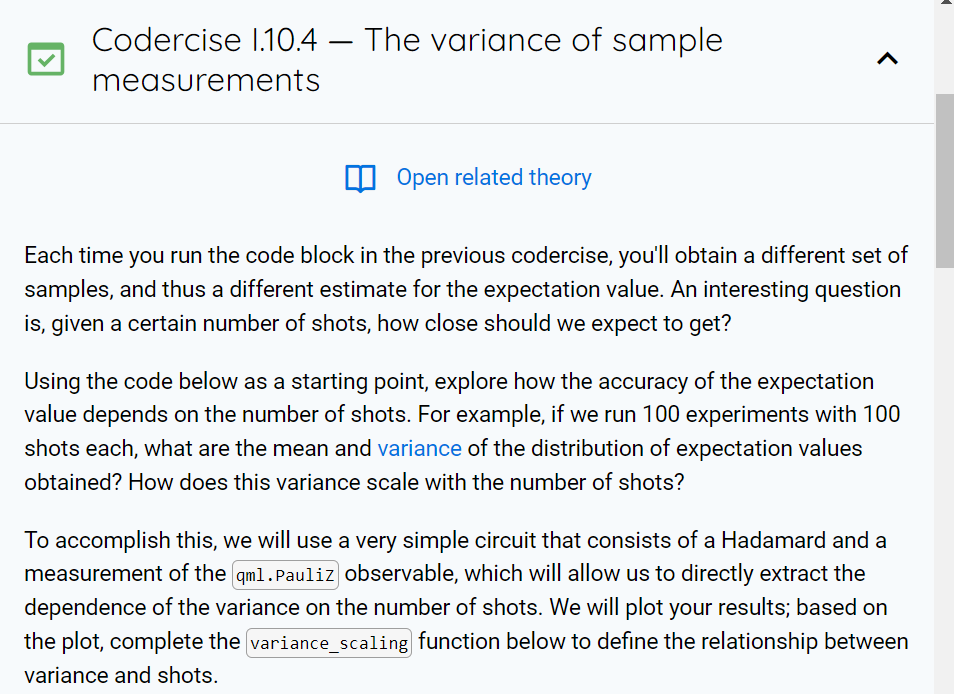

In [7]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS

    vars = []
    for _ in range(n_trials):
        result = circuit()
        vars.append(result)

    return np.var(vars)


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER
    estimated_variance = 1 / n_shots

    return estimated_variance


# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
# plot = plotter(shot_vals, results_experiment, results_scaling)

## Learnt how the expectation values changed with the number of shots.